## Các bước tiền xử lý
1. Loại bỏ cột, đổi tên
2. Đồng nhất tên quận, huyện
3. Xem quận/huyện nào tiêu thụ nhiều nhất (chọn top4)
4. Vẽ biểu đồ tròn của tát cả thuốc trong top4
5. Tạo pivot (cột là mã thuốc, hàng là thời gian, giá trị là lượng thuốc)
6. Loại bỏ những thuốc có 0 lớn hơn 6 và outlier lớn hơn 2
7. Xuất file data mới gồm 16 thuốc

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hiển thị full data frame:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None) 

In [72]:
data = pd.read_excel('D:\BME\data\drug.xlsx')

In [73]:
data_x = data.copy()
data.head()

,Mã đơn hàng,Mã KH,Tên KH,Tỉnh,Quận/huyện,Xã/phường,Ngày,SDT,Tên nhân viên,Chi nhánh,Mã thuốc,Tên thuốc,Đơn vị,Số lượng,Đơn giá
0,0c705e68-cbff-4c25-b860-881c51d7b291,N00146,Nhà thuốc Bệnh viện Nam Thăng Long,Thành phố Hà Nội,Quận Bắc Từ Liêm,Phường Xuân Đỉnh,2018-10-04,983855018.0,Phạm Thu Trang,Chi nhánh Hà Nội,G00817,Golistin-enema for children,LO,50.0,26667.0
1,0c705e68-cbff-4c25-b860-881c51d7b291,N00146,Nhà thuốc Bệnh viện Nam Thăng Long,Thành phố Hà Nội,Quận Bắc Từ Liêm,Phường Xuân Đỉnh,2018-10-04,983855018.0,Phạm Thu Trang,Chi nhánh Hà Nội,G00821,Golistin-enema,LO,30.0,35238.0
2,0c705e68-cbff-4c25-b860-881c51d7b291,N00146,Nhà thuốc Bệnh viện Nam Thăng Long,Thành phố Hà Nội,Quận Bắc Từ Liêm,Phường Xuân Đỉnh,2018-10-04,983855018.0,Phạm Thu Trang,Chi nhánh Hà Nội,P01191,Phenhalal,ONG,200.0,3950.0
3,196999A6-37EE-405C-8B9E-33E48A0455DC,P00641,Phòng khám đa khoa Hoàng Dũng - Quảng Trị,Tỉnh Quảng Trị,Thành phố Đông Hà,Phường 1,2018-10-04,977519929.0,Lưu Hữu Công,Chi nhánh Đà Nẵng,Z00209,Zentokid - H10,ONG,400.0,6500.0
4,5a1d6b35-5755-44d7-ad79-14f60dd4f0ef,B00670,Bệnh Viện Đa Khoa Huyện Tuyên Hóa ( Nhà Thuốc),Tỉnh Quảng Bình,NaN,Thị Trấn Đồng Lê -Huyện Tuyên Hoá -Tỉnh Quảng Bình,2018-10-04,911561101.0,Ngô Minh Anh Văn,Chi nhánh Đà Nẵng,H00852,Hemotocin,LO,10.0,235700.0


### 1. Loại bỏ cột, dổi tên, lọc dữ liệu

In [74]:
data = data.drop(['Mã KH','Tên KH', 'Xã/phường', 'SDT', 'Tên nhân viên','Chi nhánh'], axis=1)

data.columns = ['orderID', 'province', 'district', 'date', 'drugsID','drugsName', 'unit', 'order_numbers', 'unit_price']

data = data[(data.province == 'Tỉnh Nghệ An') | (data.province == "Nghệ An")]
data.province=data.province.replace(['Nghệ An', 'Tỉnh Nghệ An'], 'NA')

In [75]:
data1 = data.copy()
# data = data1

In [76]:
data.province.value_counts()

NA    31611
Name: province, dtype: int64

In [77]:
data1.head()

,orderID,province,district,date,drugsID,drugsName,unit,order_numbers,unit_price
54,206ac048-29e8-4601-a9b3-d0a91b72d128,NA,TT Nam Đàn,2018-10-17,G00898,Guacanyl - Hộp 4 vỉ x 5 ống 5ml,ONG,60.0,3800.000000
59,874F745A-568A-4CBE-8490-36B6B7284552,NA,Huyện Quỳnh Lưu,2018-10-17,G00898,Guacanyl - Hộp 4 vỉ x 5 ống 5ml,ONG,400.0,2850.000000
89,09B56B0F-2C71-44E3-A83A-0244FB3C1DA4,NA,Diễn Châu,2018-10-19,Z00200,Zensalbu nebules 2.5,ONG,40.0,4200.000000
112,85655F04-A7E4-4218-87A5-497D1BA4399D,NA,Huyện Yên Thành,2018-10-22,D01085,Domuvar - H20,ONG,600.0,2653.922459
124,349B15D6-46CA-4229-ADE5-79B3B67C798F,NA,Thành phố Vinh,2018-10-22,Z00197,Zensalbu nebules 5.0,ONG,20.0,8000.000000


### 2. Đồng nhất tên thành phố và huyện

In [78]:
data.district.value_counts()

Thành phố Vinh                                                12903
Huyện Quỳnh Lưu                                                3745
Huyện Diễn Châu                                                3136
Huyện Nghi Lộc                                                 1909
Huyện Yên Thành                                                1119
Thị xã Hoàng Mai                                                910
Thị xã Thái Hòa                                                 886
Huyện Nghĩa Đàn                                                 750
Huyện Thanh Chương                                              640
Huyện Đô Lương                                                  484
Huyện Nam Đàn                                                   446
Huyện Hưng Nguyên                                               398
Thị xã Cửa Lò                                                   380
Huyện Anh Sơn                                                   320
Huyện Quỳ Hợp                                   

In [79]:
data['district'] = data['district'].str.lower()
data['district'] = data['district'].str.replace(' ', '')

In [80]:
data.district.value_counts()

thànhphốvinh                                      12903
huyệnquỳnhlưu                                      3745
huyệndiễnchâu                                      3136
huyệnnghilộc                                       1909
huyệnyênthành                                      1119
thịxãhoàngmai                                       910
thịxãtháihòa                                        886
huyệnnghĩađàn                                       750
huyệnthanhchương                                    640
huyệnđôlương                                        486
huyệnnamđàn                                         446
tpvinh                                              412
huyệnhưngnguyên                                     398
thịxãcửalò                                          383
huyệnanhsơn                                         320
huyệnquỳhợp                                         296
thịxãtháihoà                                        246
quỳnhlưu                                        

In [81]:
data.district=data.district.replace(['thànhphốvinh', 'tpvinh','Vinh', 
                                     'quỳnhvinh,txhoàngmai,nghệan ',
                                     'tpvinh-nghệan', ' tpvinh-nghệan','trườngthi,tpvinh',
                                     'hưngdũng,tpvinh','phườnghưngphúc-tpvinh',
                                     'đườnglêviếtthuật_xãhưnglộc','phườnghưngbình_tpvinh','phườnghưngbình', 'huyệnhưnglộc_tpvinh'
                                     ,'phườnghưngdũng', '0913386216','nghiphú,tpvinh','phườngvinhtân','quánbàu', 'nghệan', 'nghiliên','trườngthi'
                                     ,'0974383686','xóm20xãnghiphú,tpvinh','khoanội-bệnhviêntâybắc','bệnhviệntâybắc',
                                      'hàhuytập','p.lêmaotpvinh' ], 
                                     'vinh')

data.district=data.district.replace(['huyệnquỳnhlưu', 'quỳnhlưu', 
                                     'xãsơnhải,huyệnquỳnhlưu', 'ttcầugiát,huyệnquỳnhlưu', 
                                     'quỳnhvănquỳnhlưu,nghệan', 'quỳnhlưu,nghệan','thịtrấncầugiát,huyệnquỳnhlưu'], 
                                     'quynh_luu')

data.district=data.district.replace(['huyệndiễnchâu','diễnchậ','diễnchâu','xãdiễnyênhuyệndiễnchâu-nghệan'],'dien_chau')

data.district=data.district.replace(['huyệnnghilộc','nghilộc'],'nghi_loc')

data.district=data.district.replace(['huyệnyênthành','yênthành','thịtrấnyênthành'], 'yen_thanh')

data.district=data.district.replace(['huyệnnghĩađàn','nghĩađàn','nghĩahồng,nghĩađàn'],'nghia_dan')

data.district=data.district.replace(['huyệnthanhchương','ttdùng,thanhchương','ttthanhhà'], 'thanh_chuong')

data.district=data.district.replace(['huyệnđôlương','đôlương','thịtrấnđôlương','huyệnđôlương_nghệan'],'do_luong')

data.district=data.district.replace(['huyệnhưngnguyên','hưngphúc','hưngnguyên'], 'hung_nguyen')
data.district=data.district.replace(['huyệnnamđàn','namđàn','ttnamđàn'],'nam_dan')
data.district=data.district.replace(['huyệnanhsơn'],'anh_son')
data.district=data.district.replace(['huyệnquỳhợp','quỳhợp','thịtrấnquỳhợp,huyềnquỳhợp','tamhợp,quỳhợp','nghĩaxuân,quỳhợp'], 'quy_hop')
data.district=data.district.replace(['huyệntânkỳ','thịtrấntânkỳ'], 'tan_ky')
data.district=data.district.replace(['huyệnconcuông'],'con_cuong')
data.district=data.district.replace(['huyệnquỳchâu','quỳchâu'],'quy_chau')
data.district=data.district.replace(['huyệnquếphong'],'que_phong')
data.district=data.district.replace(['huyệntươngdương','tươngdương'],'tuong_duong')
data.district=data.district.replace(['huyệnkỳsơn'],'ky_son')
data.district=data.district.replace(['thịxãhoàngmai','quỳnhvinh,txhoàngmai,nghệan','hoàngmai','khốithinhhmỹphườngquỳnhthiện-txhoàngmai-nghệan','thịxãhoàngmai,nghệan','quỳnhthiện,txhoàngmai'],'tx_hoang_mai')
data.district=data.district.replace(['thịxãtháihòa','thịxãtháihoà'],'tx_thai_hoa')
data.district=data.district.replace(['thịxãcửalò','txcửalò','cửalò','cửahội'], 'tx_cua_lo')

In [82]:
data.district.value_counts()

vinh            13433
quynh_luu        3968
dien_chau        3199
nghi_loc         1932
yen_thanh        1142
tx_thai_hoa      1132
tx_hoang_mai      945
nghia_dan         784
thanh_chuong      645
nam_dan           514
do_luong          490
hung_nguyen       423
tx_cua_lo         407
quy_hop           330
anh_son           320
tan_ky            176
con_cuong         161
quy_chau           78
que_phong          65
tuong_duong        19
ky_son             14
Name: district, dtype: int64

In [83]:
data2 = data.copy()

In [84]:
data = data2.copy()

In [85]:
data.district = data.district.fillna('vinh')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31611 entries, 54 to 791532
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orderID        31611 non-null  object        
 1   province       31611 non-null  object        
 2   district       31611 non-null  object        
 3   date           31611 non-null  datetime64[ns]
 4   drugsID        31611 non-null  object        
 5   drugsName      31611 non-null  object        
 6   unit           31611 non-null  object        
 7   order_numbers  31611 non-null  float64       
 8   unit_price     31611 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 2.4+ MB


### 3. Xem quận/huyện nào tiêu thụ nhiều nhất (chọn top4)


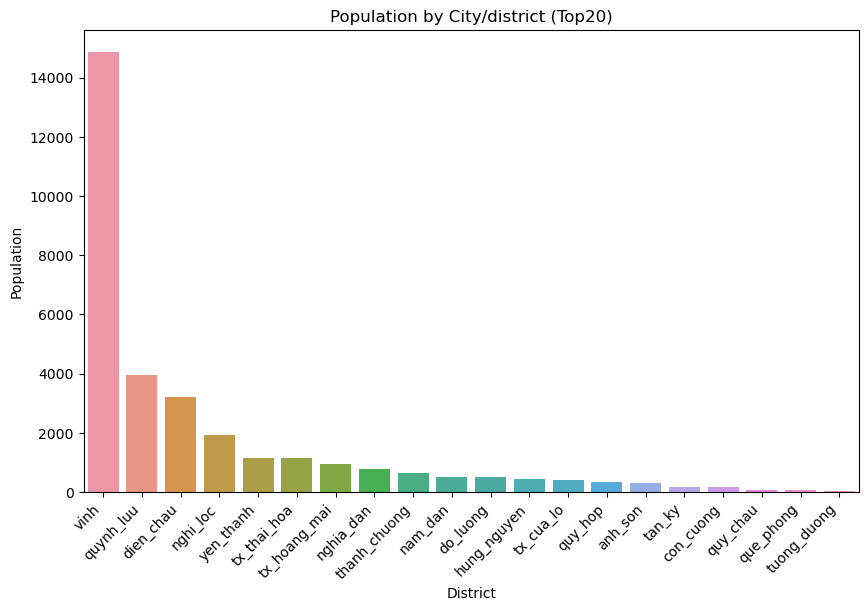

In [87]:
top = data['district'].value_counts()
top = top.head(20)
TOP = pd.DataFrame(top)
TOP= TOP.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='district', data=TOP)
# adjust the x-label rotation
plt.xticks(rotation=45, ha='right')

# add labels and title
plt.xlabel('District')
plt.ylabel('Population')
plt.title('Population by City/district (Top20)')
plt.show()

In [88]:
# Step 1: Get the value counts
value_counts = data['district'].value_counts()
# Step 2: Get the top 7 values
top_values = value_counts.nlargest(4).index.tolist()

# Step 3: Create a boolean mask for 7 locals
mask = data['district'].isin(top_values)

# Step 4: Select the rows that contain the top 7 values
df_top4 = data.loc[mask]
df_top4.district.unique()

array(['quynh_luu', 'dien_chau', 'vinh', 'nghi_loc'], dtype=object)

### 4. Vẽ biểu đồ tròn của tát cả thuốc trong top4


In [89]:
drug_50 = df_top4['drugsID'].value_counts()
drug_50.info()
top_50drug = drug_50.nlargest(50).index.tolist()

# Create a boolean mask for 50 drugID
mask1 = df_top4['drugsID'].isin(top_50drug) 

df2 = df_top4.loc[mask1]

<class 'pandas.core.series.Series'>
Index: 235 entries, P01146 to M01605
Series name: drugsID
Non-Null Count  Dtype
--------------  -----
235 non-null    int64
dtypes: int64(1)
memory usage: 3.7+ KB


N01041: 4131240.0
N00845: 3069100.0
L00726: 1274955.0
Z00197: 392460.0
K00511: 388020.0
F00464: 332805.0
Z00226: 227784.0
C01842: 175430.0
Z00219: 161485.0
Z00200: 160765.0
G00898: 116940.0
A01237: 99260.0
B01166: 96150.0
N00864: 86075.0
P01146: 62380.0
P01481: 58881.0
N00875: 57210.0
B01373: 54711.0
D01375: 44480.0
D01304: 32120.0


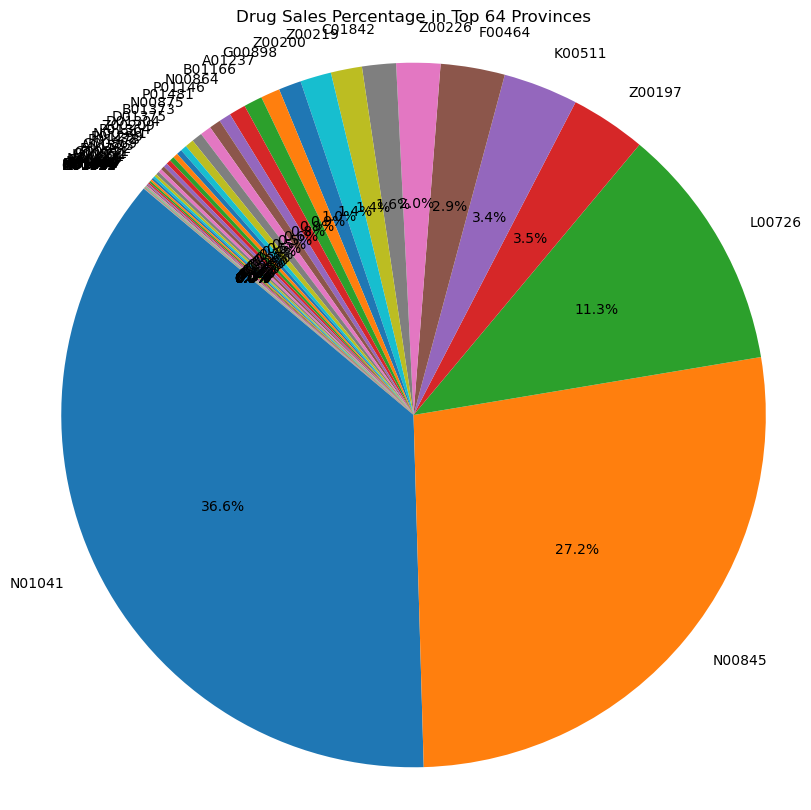

In [90]:
drug_sales = df2.groupby('drugsID')['order_numbers'].sum().reset_index()
# drug_sales = drug_sales.sort_values(by='order_numbers', ascending=False)
# plt.figure(figsize=(10, 10))
# plt.pie(drug_sales['order_numbers'], labels=drug_sales['drugsID'], autopct='%1.1f%%', startangle=140)
# plt.title("Drug Sales Percentage in Top 64 Provinces")
# plt.axis('equal')

# # Create a new column 'sales_percentage' in the DataFrame
total_sales = drug_sales['order_numbers'].sum()

# Create a new column 'sales_percentage' in the DataFrame
drug_sales['sales_percentage'] = (drug_sales['order_numbers'] / total_sales) * 100

# Sort the DataFrame by 'sales_percentage' in descending order
drug_sales = drug_sales.sort_values(by='sales_percentage', ascending=False)

# Select the top 20 provinces
top_20_drug = drug_sales.head(20)

plt.figure(figsize=(10, 10))
plt.pie(drug_sales['order_numbers'], labels=drug_sales['drugsID'], autopct='%1.1f%%', startangle=140)
plt.title("Drug Sales Percentage in Top 64 Provinces")
plt.axis('equal')

# Print the top 20 provinces and their sales percentages
for index, row in top_20_drug.iterrows():
    province = row['drugsID']
    sales = row['order_numbers']
    print(f"{province}: {sales}")


### 5. Tạo pivot (cột là mã thuốc, hàng là thời gian, giá trị là lượng thuốc)


In [91]:
df2.head(2)

,orderID,province,district,date,drugsID,drugsName,unit,order_numbers,unit_price
59,874F745A-568A-4CBE-8490-36B6B7284552,NA,quynh_luu,2018-10-17,G00898,Guacanyl - Hộp 4 vỉ x 5 ống 5ml,ONG,400.0,2850.0
89,09B56B0F-2C71-44E3-A83A-0244FB3C1DA4,NA,dien_chau,2018-10-19,Z00200,Zensalbu nebules 2.5,ONG,40.0,4200.0


In [92]:
data_month = df2.groupby(['district',pd.to_datetime(df2['date']).dt.strftime('%Y-%m'), 'drugsID'])['order_numbers'].sum().reset_index()
data_month.head(10)

,district,date,drugsID,order_numbers
0,dien_chau,2018-10,Z00200,40.0
1,dien_chau,2018-11,G00898,200.0
2,dien_chau,2018-12,G00898,200.0
3,dien_chau,2019-01,K00511,300.0
4,dien_chau,2019-01,L00726,17000.0
5,dien_chau,2019-01,Z00197,3150.0
6,dien_chau,2019-02,N00875,30.0
7,dien_chau,2019-02,Z00197,2050.0
8,dien_chau,2019-02,Z00200,200.0
9,dien_chau,2019-03,G00898,200.0


In [93]:
data_month.district.value_counts()

vinh         1435
quynh_luu     855
nghi_loc      696
dien_chau     655
Name: district, dtype: int64

In [94]:
pivot_month = pd.pivot_table(data_month, values='order_numbers', index='date', columns='drugsID', aggfunc=np.sum)

### 6. Loại bỏ những thuốc có 0 lớn hơn 6 và outlier lớn hơn 2


In [95]:
# Log transformed data
data0_std = np.log(pivot_month)
data0_std.describe()
# fill NaN == 0
data0_std = data0_std.fillna(0)

# set threshold for number of zeros
threshold = 6

# drop columns with more than the threshold number of zeros
data1_std = data0_std.loc[:, (data0_std == 0).sum() <= threshold]
data1_std.describe()

drugsID,A01237,A01303,B01166,C01842,F00464,G00869,G00898,H00852,M01090,M01225,N00845,N00864,Z00197,Z00200,Z00209,Z00219,Z00226
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,6.696370,4.459588,6.355709,7.002621,8.386173,5.534691,7.084896,4.631987,3.530273,4.364689,7.504229,6.334729,8.437083,7.487015,5.585759,7.069640,7.213744
std,2.281386,2.321362,2.720652,2.726390,1.936540,1.513287,1.858736,1.746231,1.488790,1.792168,3.973718,2.661116,1.422201,1.603546,1.856392,2.076917,2.531229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.401197,2.302585,0.000000,0.000000,0.000000
25%,6.564973,3.637586,6.586101,6.809387,8.665542,5.384799,6.756932,4.007333,2.995732,3.718325,4.834243,6.551080,7.807819,7.188647,5.504505,6.112380,6.783026
50%,6.965312,4.448362,7.098341,7.962061,8.956738,5.980054,7.517521,5.027030,3.583133,4.581624,7.534137,7.222326,8.744943,7.982758,6.076441,7.260886,7.843656
75%,8.030960,6.351349,8.048227,8.590423,9.188988,6.316713,8.069339,5.686975,4.838211,5.757838,10.875981,7.847670,9.365002,8.588886,6.613316,8.398341,8.812365
max,9.220291,7.824046,8.884610,10.151519,9.667765,7.643962,9.409191,7.501082,5.351858,7.022868,13.625076,9.229162,10.661954,9.678467,8.480529,9.623112,10.036750


In [96]:
# Determine the criteria for identifying outliers, e.g., using IQR
Q1 = pivot_month.quantile(0.25)
Q3 = pivot_month.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5

# Calculate the number of outliers in each column
outliers = ((data1_std < (Q1 - threshold * IQR)) | (data1_std > (Q3 + threshold * IQR))).sum()
outliers
# Identify the columns that have more than 3 outliers
columns_to_drop = []
for col in outliers.index:
    if outliers[col] > 2:
        columns_to_drop.append(col)

# Drop the identified columns
data2_std = data1_std.drop(columns_to_drop, axis=1)
data2_std.describe()

C:\Users\luong\AppData\Local\Temp\ipykernel_4596\1335194123.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data1_std < (Q1 - threshold * IQR)) | (data1_std > (Q3 + threshold * IQR))).sum()
C:\Users\luong\AppData\Local\Temp\ipykernel_4596\1335194123.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data1_std < (Q1 - threshold * IQR)) | (data1_std > (Q3 + threshold * IQR))).sum()


drugsID,A01237,A01303,B01166,C01842,G00869,G00898,H00852,M01090,M01225,N00845,N00864,Z00197,Z00200,Z00209,Z00219,Z00226
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,6.696370,4.459588,6.355709,7.002621,5.534691,7.084896,4.631987,3.530273,4.364689,7.504229,6.334729,8.437083,7.487015,5.585759,7.069640,7.213744
std,2.281386,2.321362,2.720652,2.726390,1.513287,1.858736,1.746231,1.488790,1.792168,3.973718,2.661116,1.422201,1.603546,1.856392,2.076917,2.531229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.401197,2.302585,0.000000,0.000000,0.000000
25%,6.564973,3.637586,6.586101,6.809387,5.384799,6.756932,4.007333,2.995732,3.718325,4.834243,6.551080,7.807819,7.188647,5.504505,6.112380,6.783026
50%,6.965312,4.448362,7.098341,7.962061,5.980054,7.517521,5.027030,3.583133,4.581624,7.534137,7.222326,8.744943,7.982758,6.076441,7.260886,7.843656
75%,8.030960,6.351349,8.048227,8.590423,6.316713,8.069339,5.686975,4.838211,5.757838,10.875981,7.847670,9.365002,8.588886,6.613316,8.398341,8.812365
max,9.220291,7.824046,8.884610,10.151519,7.643962,9.409191,7.501082,5.351858,7.022868,13.625076,9.229162,10.661954,9.678467,8.480529,9.623112,10.036750


### 7. Xuất file data mới gồm 16 thuốc

In [97]:
data2_std.columns.nunique()

16

In [98]:
column = data2_std.columns

data_model = data_month[data_month.drugsID.isin(column)]
data_model.order_numbers = np.log(data_model.order_numbers)

C:\Users\luong\AppData\Local\Temp\ipykernel_4596\339301359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.order_numbers = np.log(data_model.order_numbers)


In [99]:
data_model.rename(columns={
    'district': 'city',
    'date': 'time_step',
    'drugID': 'code',
    'quantity':'amount'
}, inplace=True)

C:\Users\luong\AppData\Local\Temp\ipykernel_4596\3427081541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.rename(columns={


In [100]:
file_name = 'data_4_paper.xlsx'
  
# saving the excel
data_model.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


#### 7.1 tạo file theo ngày

In [101]:
data_day = df2.groupby(['district',pd.to_datetime(df2['date']).dt.strftime('%Y-%m-%d'), 'drugsID'])['order_numbers'].sum().reset_index()
data_day.head(10)

,district,date,drugsID,order_numbers
0,dien_chau,2018-10-19,Z00200,40.0
1,dien_chau,2018-11-21,G00898,200.0
2,dien_chau,2018-12-27,G00898,200.0
3,dien_chau,2019-01-16,L00726,5000.0
4,dien_chau,2019-01-24,K00511,300.0
5,dien_chau,2019-01-24,L00726,12000.0
6,dien_chau,2019-01-24,Z00197,3150.0
7,dien_chau,2019-02-11,Z00200,100.0
8,dien_chau,2019-02-20,Z00197,1050.0
9,dien_chau,2019-02-23,N00875,30.0


In [102]:

data_day['date'] = pd.to_datetime(data_day['date'])

# Generate a full date range covering the entire period of interest
full_date_range = pd.date_range(start=data_day['date'].min(), end=data_day['date'].max(), freq='D')
full_date_df = pd.DataFrame({'date': full_date_range})
merged_data = pd.merge(full_date_df, data_day, on='date', how='left')

merged_data = merged_data.fillna(0)
merged_data.head(4)

,date,district,drugsID,order_numbers
0,2018-10-17,quynh_luu,G00898,400.0
1,2018-10-18,0,0,0.0
2,2018-10-19,dien_chau,Z00200,40.0
3,2018-10-20,0,0,0.0


In [103]:
file_name = 'data_4_paper_day.xlsx'
  
# saving the excel
data_day.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


### 7.5 chia nhóm (tạm dừng)

In [105]:
# pivot_drug = pd.pivot_table(data_model, values='order_numbers', index='date', columns='drugsID', aggfunc=np.sum)

In [ ]:
# pivot_drug = pivot_drug.fillna(0)
# pivot_drug.head(3)

In [ ]:
# correlation_matrix = pivot_drug.corr()

# plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()